Был выбран датасет Red Wine Quality(https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)

Предметная область: Виноделие и пищевая промышленность. Датасет содержит данные о красном вине португальского сорта "Vinho Verde" из северного региона Португалии.

Источник данных: UCI Machine Learning Repository, исследование Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos и Jose Reis (2009). Данные собраны в рамках научного исследования для моделирования винных предпочтений на основе физико-химических свойств.

Характер данных: Реальные экспериментальные данные, полученные в результате лабораторных физико-химических анализов образцов вина. Оценка качества основана на сенсорных данных - медиане оценок минимум 3 экспертов по виноделию.

Атрибуты датасета:
числовые:
1)fixed acidity - фиксированная кислотность
2)volatile acidity - летучая кислотность
3)citric acid - лимонная кислота
4)residual sugar - остаточный сахар
5)chlorides - хлориды
6)free sulfur dioxide - свободный диоксид серы
7)total sulfur dioxide - общий диоксид серы
8)density - плотность
9)pH - водородный показатель
10)sulphates - сульфаты
11)alcohol - содержание алкоголя
Выходная переменная:
12) quality - качество вина (числовая, целочисленная шкала от 0 до 10, где 0 - очень плохое, 10 - превосходное)
Задача анализа: Датасет может использоваться как для задач классификации, так и для регрессии. Основная цель - предсказание качества вина на основе его физико-химических характеристик.

Чтобы найти среднее значение и ско для каждого атрибута, используем библиотеку pandas.
df.mean() и df.std() посчитают метрики сразу для всех числовых столбцов.

In [34]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

mean_values = df.mean()
print("Средние значения:")
print(mean_values)

std_values = df.std()
print("\nСКО:")
print(std_values)

Средние значения:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

СКО:
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


Чтобы построить гистограммы распределений по всем числовым атрибутам, используем pandas и Matplotlib: df.hist() автоматически рисует по одному графику на столбец, figsize задает размер сетки.

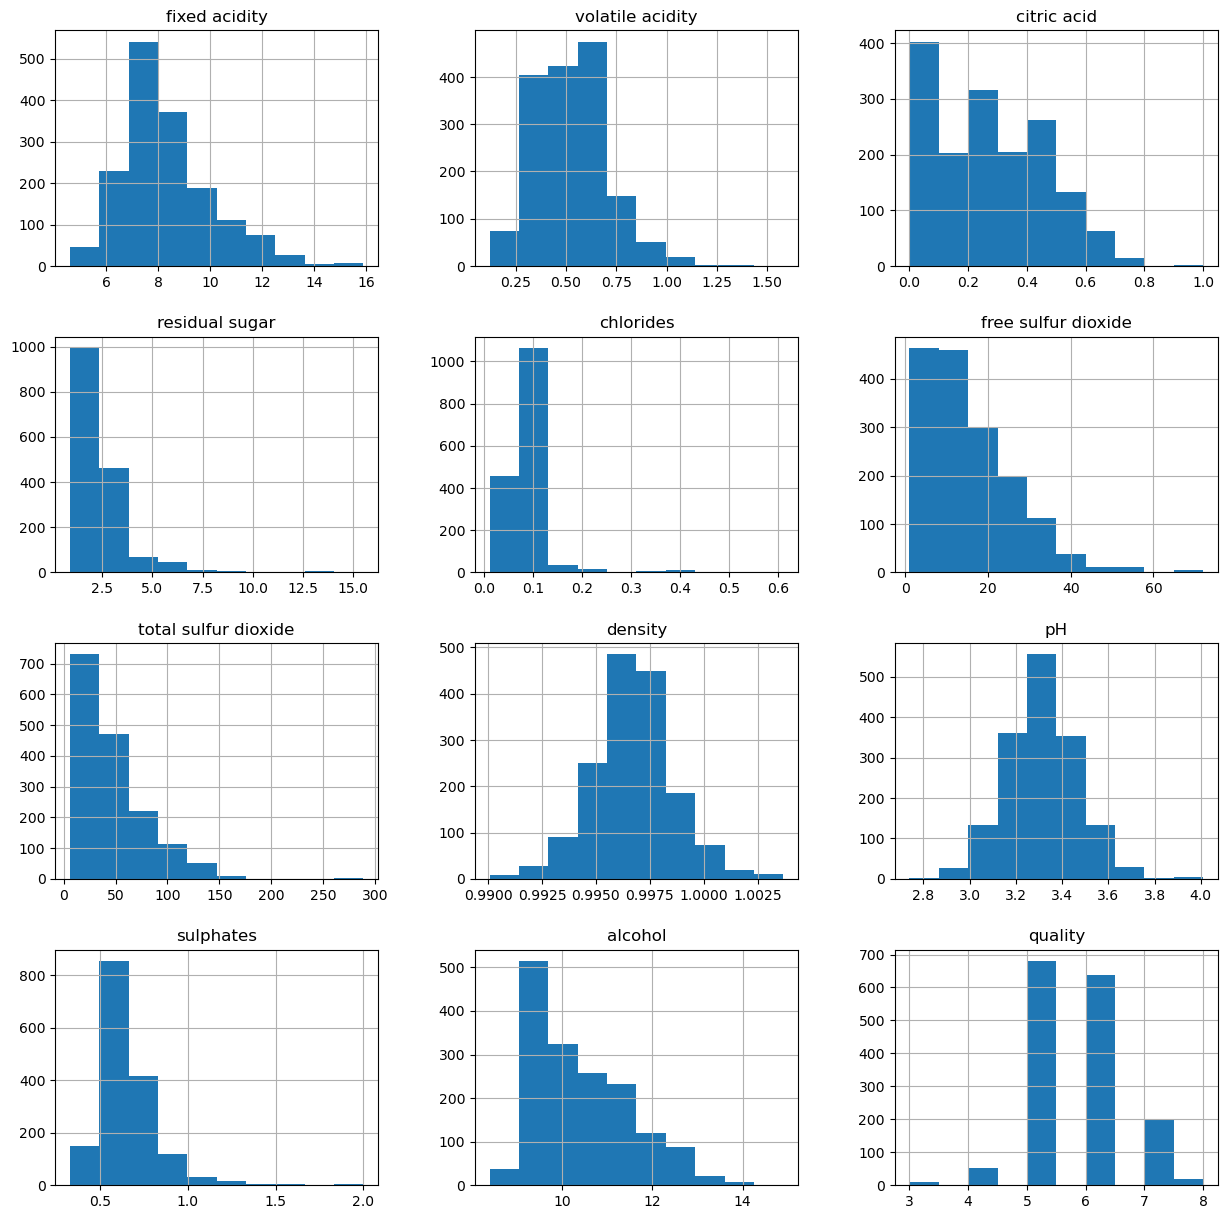

In [41]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

Чтобы показать распределение и выявить выбросы по всем атрибутам, построим boxplot из pandas: df.boxplot() рисует ящики с усами по каждому числовому столбцу; figsize задаёт размер, а plt.xticks(rotation=45) поворачивает подписи оси X для читаемости. Точки за усами это выбросы

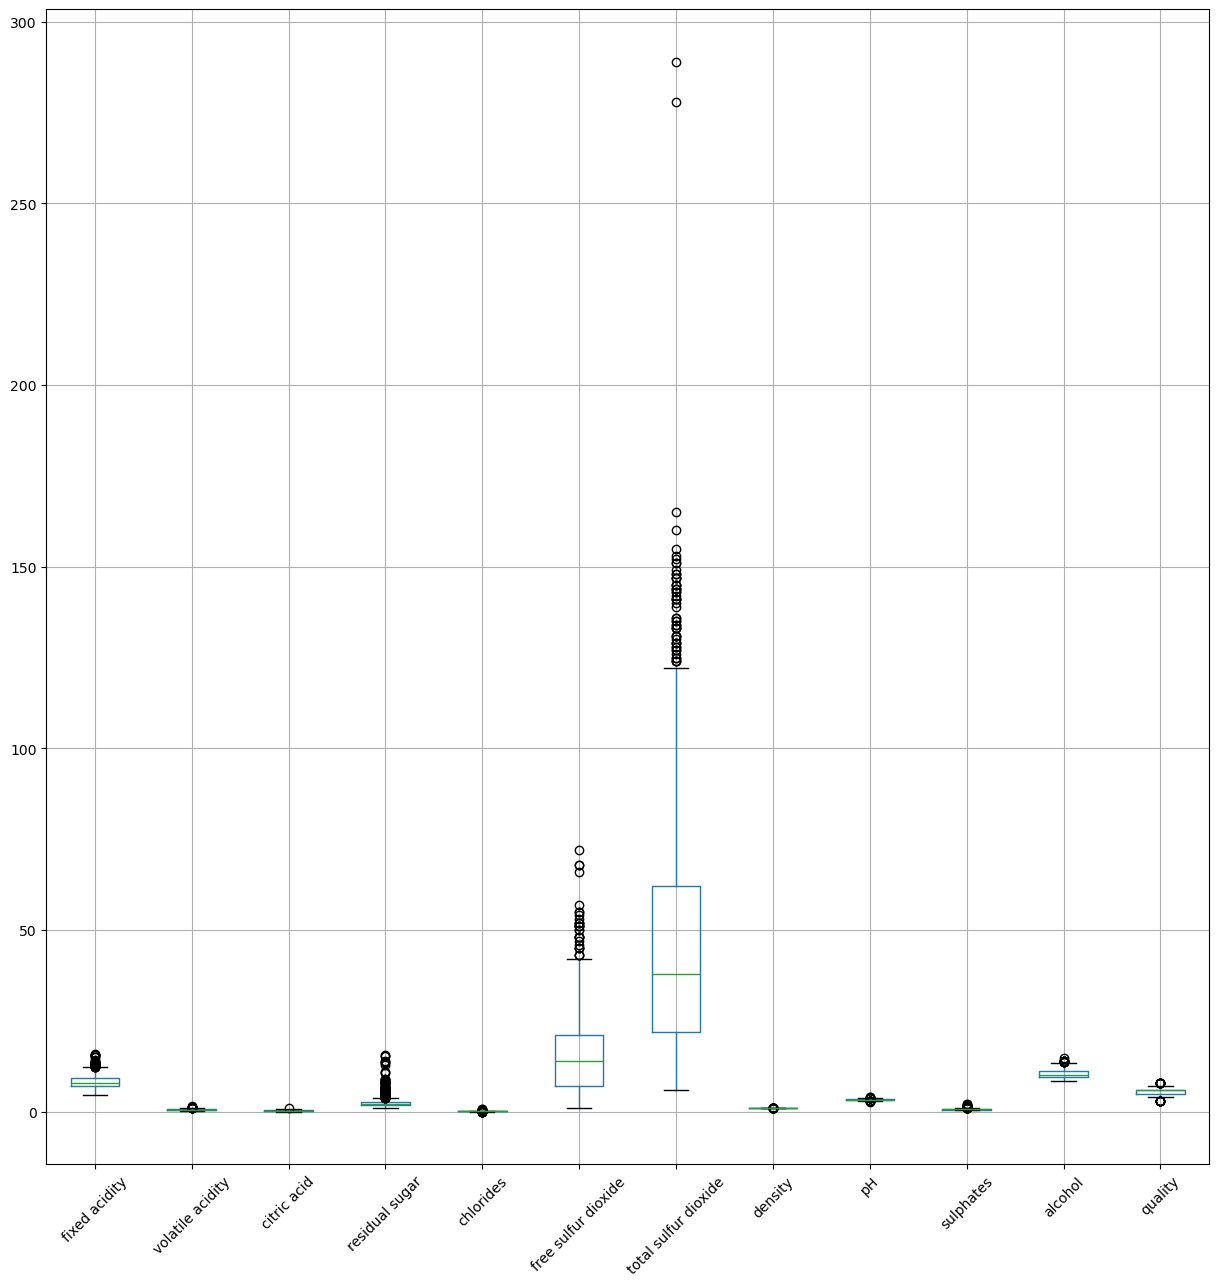

In [43]:
df.boxplot(figsize=(15,15))
plt.xticks(rotation=45)
plt.show()

Выбросы обнаружены во всех 12 параметрах датасета. Наибольшее количество выбросов наблюдается в параметрах total sulfur dioxide, free sulfur dioxide и residual sugar.

Найдем пропущенные значения. df.isna().sum() вернёт количество пропущенных в каждом столбце

In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропущенных значений в датасете нет.

Чтобы определить, какие пары признаков связаны и насколько df.corr(), он считает матрицу корреляций Пирсона по всем числовым столбцам. Дальше раскладываем пары по категориям r: >=0.9 (очень сильная), 0.7–0.9 (сильная), 0.4–0.7 (умеренная), 0.2–0.4 (слабая), <0.2 (нет корреляции).

In [33]:
corr = df.corr()
very_strong = []   # >= 0.9
strong = []        # 0.7-0.9
moderate = []      # 0.4-0.7
weak = []          # 0.2-0.4
no_corr = []       # < 0.2

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        abs_r = abs(r)
        
        var1 = corr.columns[i]
        var2 = corr.columns[j]
        direction = "положительная" if r > 0 else "отрицательная"
        
        pair = {
            'Переменная 1': var1,
            'Переменная 2': var2,
            'Корреляция': round(r, 3),
            'Направление': direction
        }
    
        if abs_r >= 0.9:
            very_strong.append(pair)
        elif abs_r >= 0.7:
            strong.append(pair)
        elif abs_r >= 0.4:
            moderate.append(pair)
        elif abs_r >= 0.2:
            weak.append(pair)
        else:
            no_corr.append(pair)

print("\n" + "="*70)
print("ОЧЕНЬ СИЛЬНАЯ КОРРЕЛЯЦИЯ (|r| >= 0.9):")
print("="*70)
if very_strong:
    print(pd.DataFrame(very_strong))
else:
    print("Не обнаружено")

print("\n" + "="*70)
print("СИЛЬНАЯ КОРРЕЛЯЦИЯ (0.7 <= |r| < 0.9):")
print("="*70)
if strong:
    print(pd.DataFrame(strong))
else:
    print("Не обнаружено")

print("\n" + "="*70)
print("УМЕРЕННАЯ КОРРЕЛЯЦИЯ (0.4 <= |r| < 0.7):")
print("="*70)
if moderate:
    print(pd.DataFrame(moderate))
    print(f"\nВсего: {len(moderate)} пар")
else:
    print("Не обнаружено")

print("\n" + "="*70)
print("СЛАБАЯ КОРРЕЛЯЦИЯ (0.2 <= |r| < 0.4):")
print("="*70)
if weak:
    print(pd.DataFrame(weak))
    print(f"\nВсего: {len(weak)} пар")
else:
    print("Не обнаружено")

print("\n" + "="*70)
print("БЕЗ КОРРЕЛЯЦИИ (|r| < 0.2):")
print("="*70)
if no_corr:
    df_no = pd.DataFrame(no_corr)
    print(df_no[['Переменная 1', 'Переменная 2', 'Корреляция']])
    print(f"\nВсего: {len(no_corr)} пар")
else:
    print("Не обнаружено")


ОЧЕНЬ СИЛЬНАЯ КОРРЕЛЯЦИЯ (|r| >= 0.9):
Не обнаружено

СИЛЬНАЯ КОРРЕЛЯЦИЯ (0.7 <= |r| < 0.9):
Не обнаружено

УМЕРЕННАЯ КОРРЕЛЯЦИЯ (0.4 <= |r| < 0.7):
          Переменная 1          Переменная 2  Корреляция    Направление
0        fixed acidity           citric acid       0.672  положительная
1        fixed acidity               density       0.668  положительная
2        fixed acidity                    pH      -0.683  отрицательная
3     volatile acidity           citric acid      -0.552  отрицательная
4          citric acid                    pH      -0.542  отрицательная
5  free sulfur dioxide  total sulfur dioxide       0.668  положительная
6              density               alcohol      -0.496  отрицательная
7              alcohol               quality       0.476  положительная

Всего: 8 пар

СЛАБАЯ КОРРЕЛЯЦИЯ (0.2 <= |r| < 0.4):
            Переменная 1          Переменная 2  Корреляция    Направление
0          fixed acidity      volatile acidity      -0.256  отрицательная
1

Чтобы визуально проверить пары признаков, воспользуемся библиотекой seaborn.  
sns.pairplot(df) рисует отношения между всеми числовыми колонками.

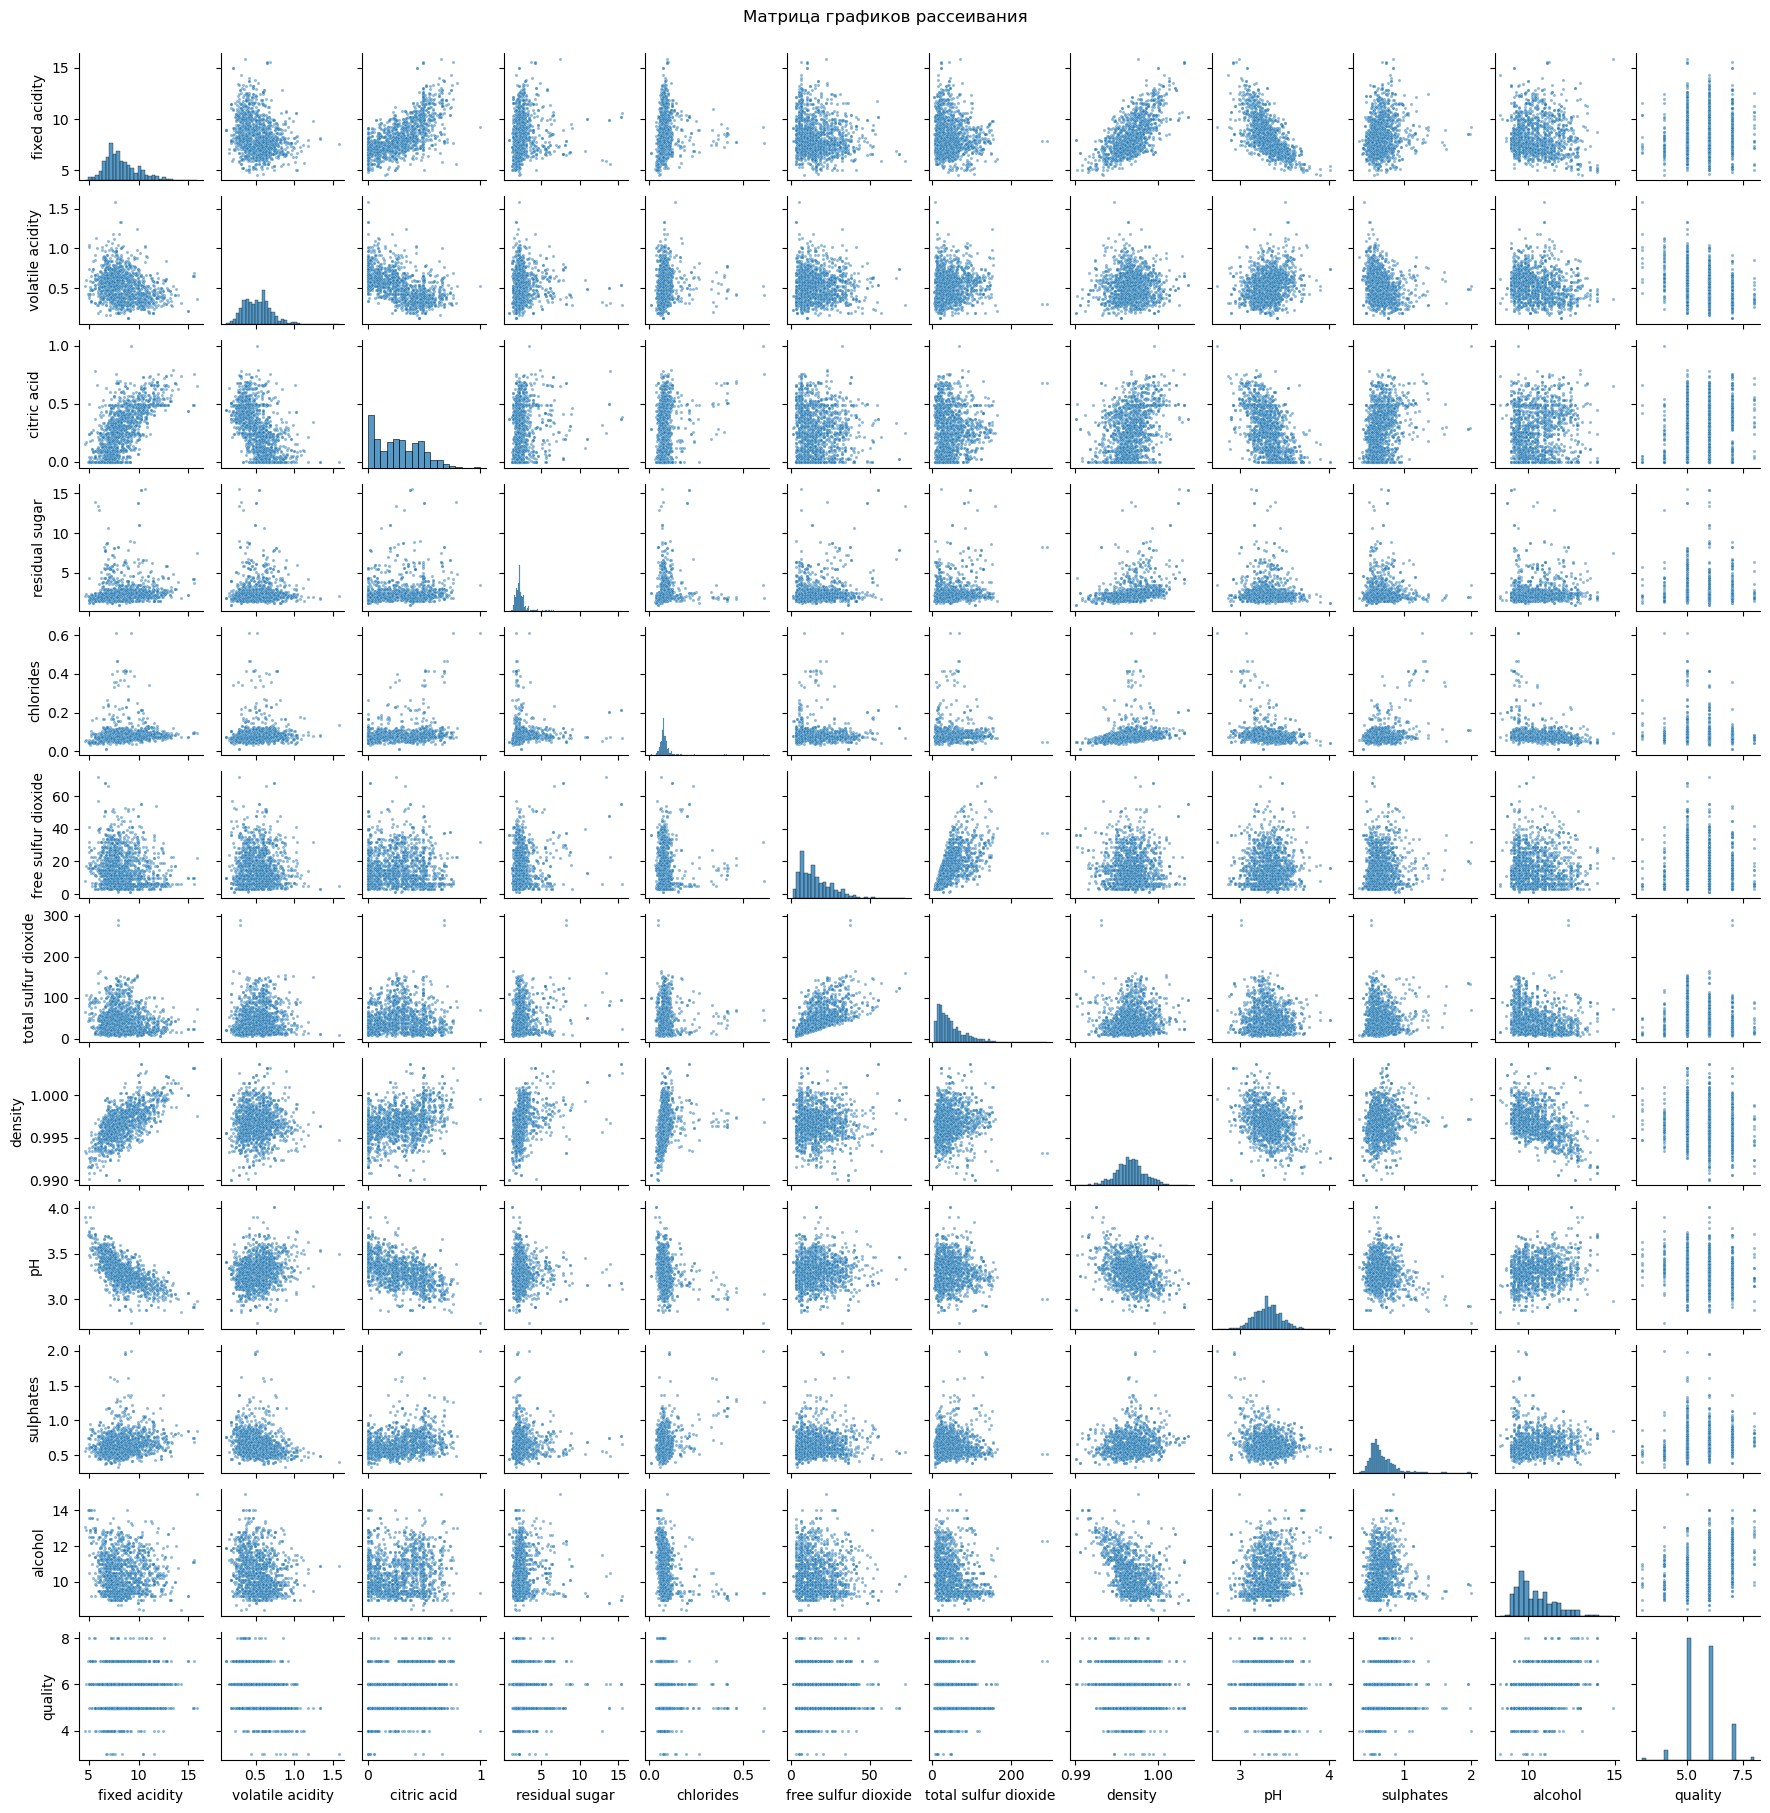

In [32]:
import seaborn as sns
sns.pairplot(df, plot_kws={'s': 5, 'alpha': 0.5},height =1.5)
plt.suptitle('Матрица графиков рассеивания', y=1.01)
plt.show()

Высококоррелированных пар в датасете не было обнаружено. 
Обнаружено 39 пар атрибутов с отсутствующей корреляцией. Это означает, что данные параметры практически не связаны линейно.

Важные умеренные связи:
alcohol и density — умеренная отрицательная связь: чем больше спирта, тем ниже плотность, потому что этанол легче воды.
alcohol и quality — умеренная положительная: более крепкие вина в среднем получают выше оценки качества в этом наборе.
free SO2 и total SO2 — умеренная положительная: свободный SO2 входит в общий, поэтому растут вместе.
fixed acidity и pH — умеренная отрицательная: больше кислотности — ниже pH.
fixed acidity и citric acid — умеренная положительная: лимонная кислота — часть общей кислотности, поэтому показатели движутся вместе.

Вывод: В ходе проведённого анализа датасета Red Wine Quality установлено, что набор данных является качественным и пригодным для дальнейшего применения алгоритмов машинного обучения. Датасет не содержит пропущенных значений, отсутствует сильная взаимозависимость между признаками, а выявленные корреляционные зависимости имеют логичное физико-химическое объяснение.